<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Inference_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# Create bar plot for Home Ownership by Gender
ggplot(NHANES, aes(x = Gender, fill = HomeOwn)) + 
  # Set the position to fill
  geom_bar(position = "fill") +
  ylab("Relative frequencies")

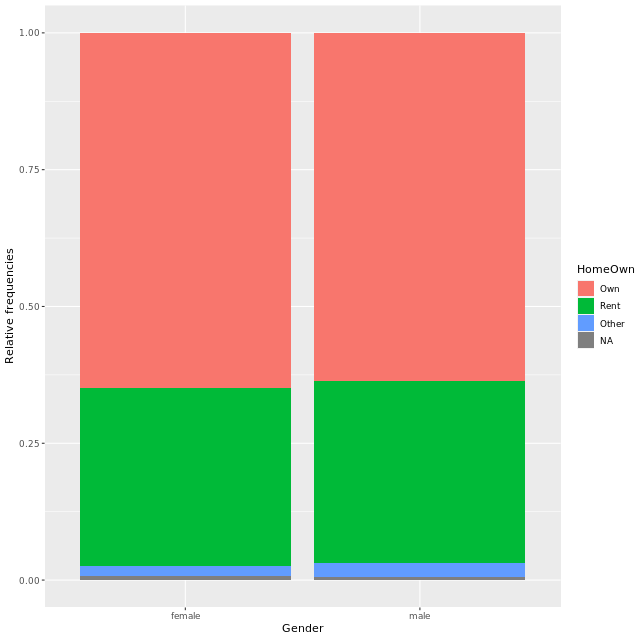

In [ ]:
# Density plot of SleepHrsNight colored by SleepTrouble
ggplot(NHANES, aes(x = SleepHrsNight, color = SleepTrouble)) + 
  # Adjust by 2
  geom_density(adjust = 2) + 
  # Facet by HealthGen
  facet_wrap(~ HealthGen)

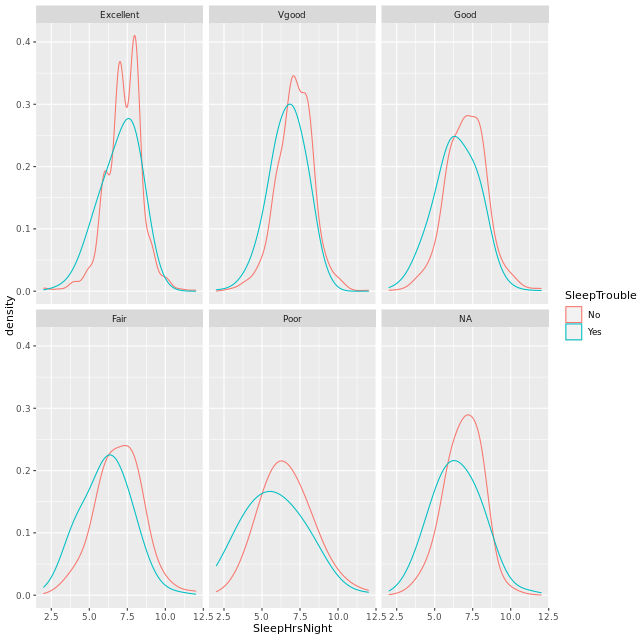

In [ ]:
# From previous step
homes <- NHANES %>%
  select(Gender, HomeOwn) %>%
  filter(HomeOwn %in% c("Own", "Rent"))

diff_orig <- homes %>%   
  # Group by gender
  group_by(Gender) %>%
  # Summarize proportion of homeowners
  summarize(prop_own = mean(HomeOwn == "Own")) %>%
  # Summarize difference in proportion of homeowners
  summarize(obs_diff_prop = diff(prop_own)) # male - female
  
# See the result
diff_orig

In [ ]:
# Perform 100 permutations
homeown_perm <- homes %>%
  specify(HomeOwn ~ Gender, success = "Own") %>%
  hypothesize(null = "independence") %>% 
  generate(reps = 100, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("male", "female"))
  
# Dotplot of 100 permuted differences in proportions
ggplot(homeown_perm, aes(x = stat)) + 
  geom_dotplot(binwidth = 0.001)

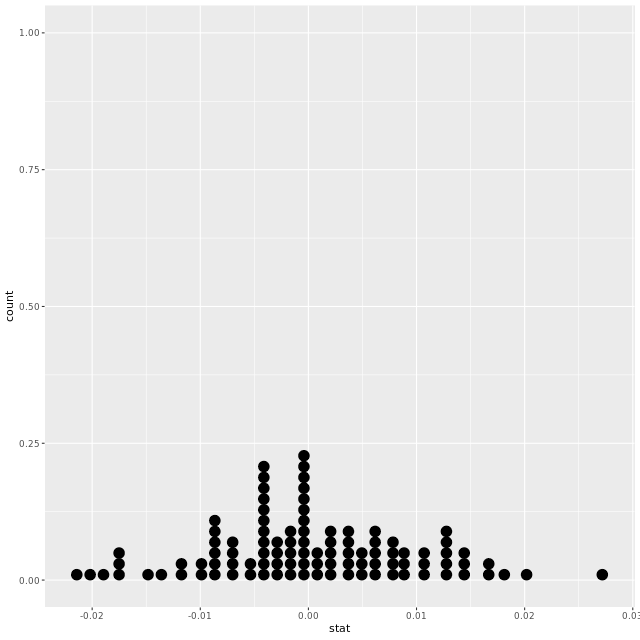

In [ ]:
# Perform 1000 permutations
homeown_perm <- homes %>%
  # Specify HomeOwn vs. Gender, with `"Own" as success
  specify(HomeOwn ~ Gender, success = "Own") %>%
  # Use a null hypothesis of independence
  hypothesize(null = "independence") %>% 
  # Generate 1000 repetitions (by permutation)
  generate(reps = 1000, type = "permute") %>% 
  # Calculate the difference in proportions (male then female)
  calculate(stat = "diff in props", order = c("male", "female"))

# Density plot of 1000 permuted differences in proportions
ggplot(homeown_perm, aes(x = stat)) + 
  geom_density()

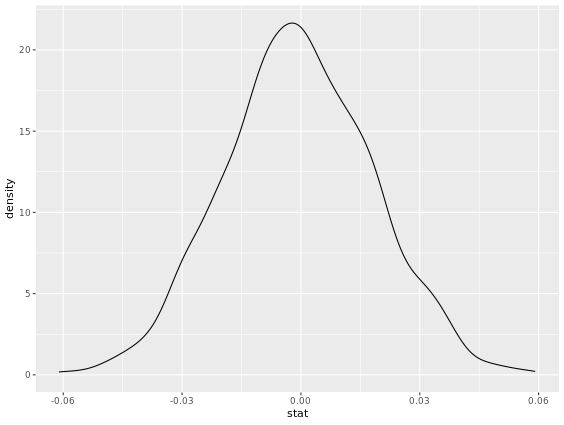